In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

from sage.xai.load_plots import load_imgs, create_title
from sage.xai.utils import top_q
from sage.xai.nilearn_plots import plot_brain, plot_glass_brain, plot_overlay

from nilearn.plotting import glass_brain, plot_roi

In [2]:
mask_path = "assets/weights/resnet10t-aug/no-mask/ig-total/attrs.npy"
# mask_path = "assets/weights/resnet10t-aug/no-mask/ig-indiv-k0.99/attrs.npy"
mask = np.load(mask_path)

## Play with ATLAS

In [8]:
from nilearn.datasets import fetch_atlas_harvard_oxford, fetch_atlas_aal

In [9]:
atlas = fetch_atlas_harvard_oxford(atlas_name="cortl-maxprob-thr50-1mm")
aal = fetch_atlas_aal()

In [16]:
np.unique(atlas.maps.get_fdata())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
       54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.,
       67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79.,
       80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92.,
       94., 95., 96.])

In [18]:
type(atlas.maps)

nibabel.nifti1.Nifti1Image

## Mask Generation

/home/1pha/.conda/envs/age/lib/python3.10/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


(<nilearn.plotting.displays._projectors.OrthoProjector at 0x7fea2ee9eec0>,
 None)

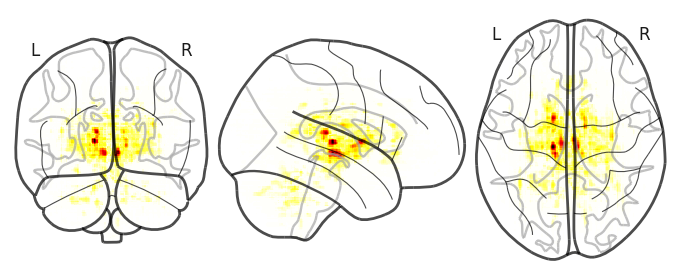

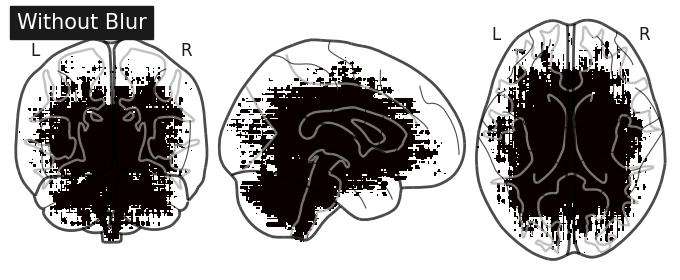

In [31]:
plot_glass_brain(mask)

bool_mask = ~np.isnan(mask) & (mask > 0)
bool_mask = bool_mask.astype(np.int32)
plot_glass_brain(bool_mask, title="Without Blur")

/home/1pha/.conda/envs/age/lib/python3.10/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


(<nilearn.plotting.displays._projectors.OrthoProjector at 0x7f24bc6c7e50>,
 None)

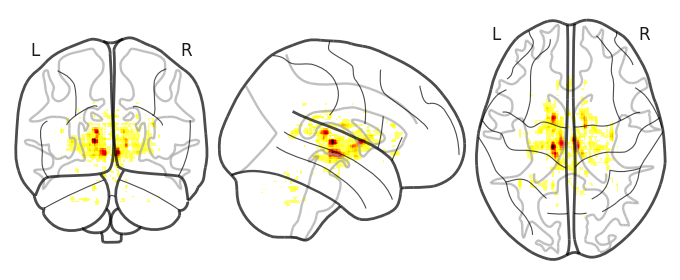

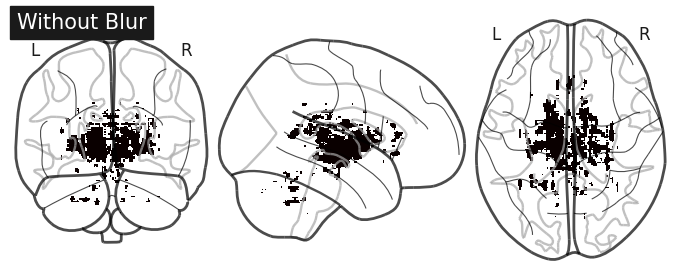

In [5]:
top = top_q(mask, q=0.995, return_bool=False)
plot_glass_brain(top)

bool_top = ~np.isnan(top) & (top > 0)
bool_top = bool_top.astype(np.int32)
plot_glass_brain(bool_top, title="Without Blur")

/home/1pha/.conda/envs/age/lib/python3.10/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


(<nilearn.plotting.displays._projectors.OrthoProjector at 0x7fea2ef17bb0>,
 None)

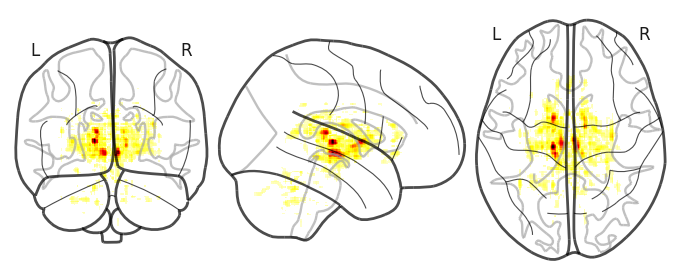

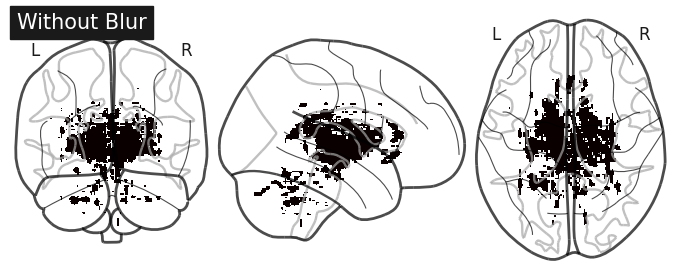

In [27]:
top = top_q(mask, q=0.99, return_bool=False)
plot_glass_brain(top)

bool_top = ~np.isnan(top) & (top > 0)
bool_top = bool_top.astype(np.int32)
plot_glass_brain(bool_top, title="Without Blur")

(<nilearn.plotting.displays._projectors.OrthoProjector at 0x7fea2f40fc70>,
 None)

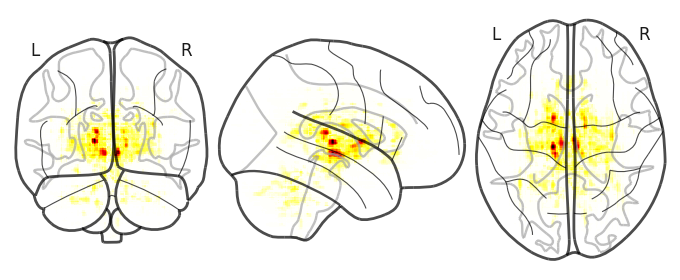

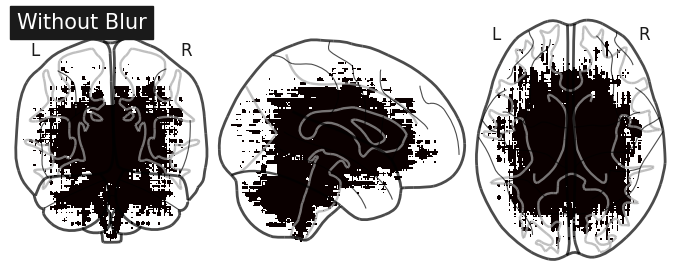

In [28]:
top = top_q(mask, q=0.90, return_bool=False)
plot_glass_brain(top)

bool_top = ~np.isnan(top) & (top > 0)
bool_top = bool_top.astype(np.int32)
plot_glass_brain(bool_top, title="Without Blur")

/home/1pha/.conda/envs/age/lib/python3.10/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(


(<nilearn.plotting.displays._projectors.OrthoProjector at 0x7f24d165aa10>,
 None)

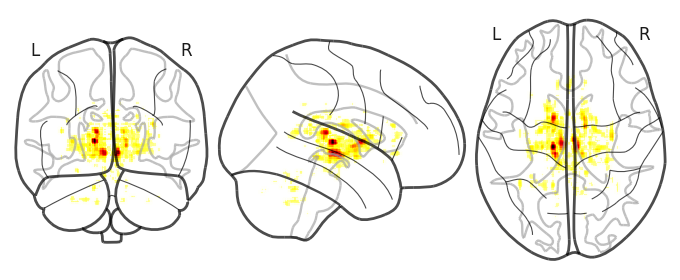

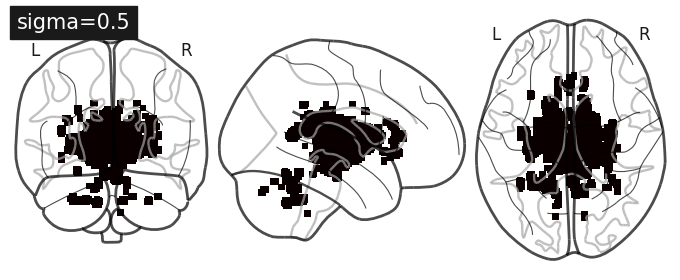

In [6]:
sigma = 0.5

blur = gaussian_filter(input=top, sigma=sigma)
plot_glass_brain(blur)

bool_blur = ~np.isnan(blur) & (blur > 0)
bool_blur = bool_blur.astype(np.int32)
plot_glass_brain(bool_blur, title=f"sigma={sigma}")

(<nilearn.plotting.displays._projectors.OrthoProjector at 0x7f24d14263b0>,
 None)

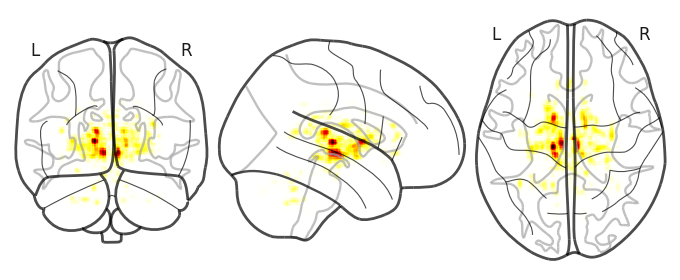

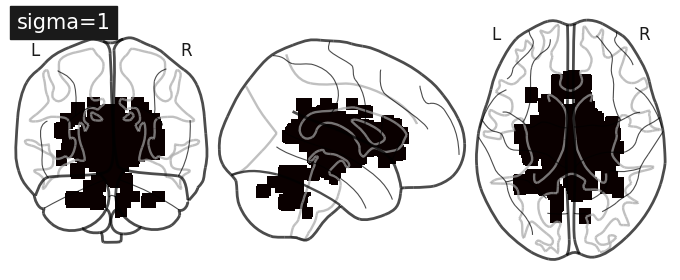

In [7]:
sigma = 1

blur = gaussian_filter(input=top, sigma=sigma)
plot_glass_brain(blur)

bool_blur = ~np.isnan(blur) & (blur > 0)
bool_blur = bool_blur.astype(np.int32)
plot_glass_brain(bool_blur, title=f"sigma={sigma}")

In [20]:
np.save(file=f"assets/masks/resnet10t-aug-nomask-ig0.99-0.995-sigma{sigma}.npy", arr=bool_blur)

(<nilearn.plotting.displays._projectors.OrthoProjector at 0x7fbf138d3160>,
 None)

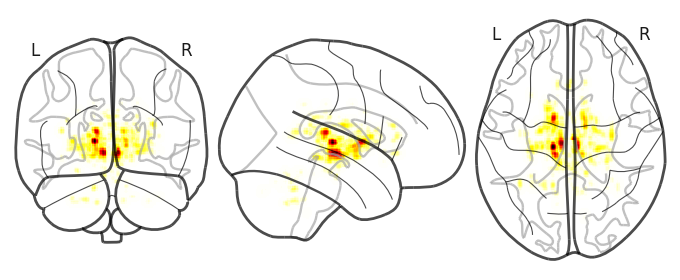

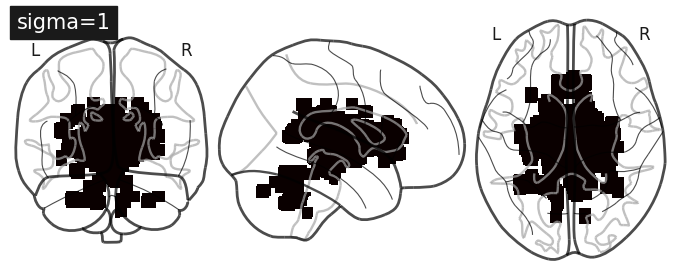

In [13]:
sigma = 1

blur = gaussian_filter(input=top, sigma=sigma)
plot_glass_brain(blur)

bool_blur = ~np.isnan(blur) & (blur > 0)
bool_blur = bool_blur.astype(np.int32)
plot_glass_brain(bool_blur, title=f"sigma={sigma}")

(<nilearn.plotting.displays._projectors.OrthoProjector at 0x7fbf0c652710>,
 None)

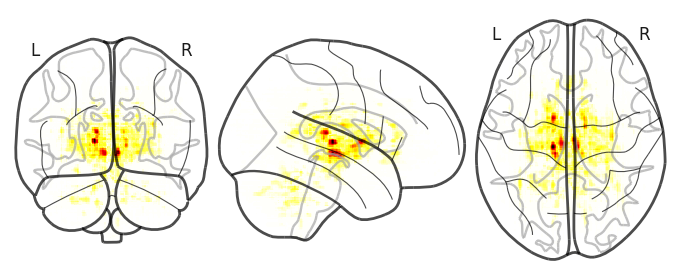

In [12]:
plot_glass_brain(mask)

In [2]:
def get_stacked_img(path: list = ["resnet10t-mask", "resnet10t-naive"],
                    method: str = "ig",
                    indiv: bool = False,
                    mask: bool = True,
                    top_k: float = 0.95,):

    img_dict = dict(path=path, method=method, indiv=indiv, mask=mask, top_k=top_k)

    imgs = load_imgs(**img_dict)
    num_img = len(imgs)
    print(imgs)
    fig, ax = plt.subplots(nrows=num_img, figsize=(12, 4 * num_img))
    
    method = img_dict.get("method")
    indiv = img_dict.get("indiv")
    mask: bool = img_dict.get("mask")
    mask = f"Infer {'w/' if mask else 'w/o'} Mask"
    title = f"{mask} | XAI Method={method}"
    fig.suptitle(title, size="x-large")
    for idx, (img, path) in enumerate(zip(imgs, img_dict["path"])):
        img = Image.open(img)
        _ax = ax[idx]
        
        _ax.imshow(img)
        _ax.tick_params(left=False, right=False, bottom=False,
                            labelleft=False, labelbottom=False)
        # title = create_title(path=path, img_dict=img_dict)
        _ax.set_title(path)
        _ax.grid(visible=False)
    fig.tight_layout()

[PosixPath('assets/weights/resnet10t-aug/no-mask/gbpk0.99/top_glass.png'), PosixPath('assets/weights/resnet10t-sigma0.5/no-mask/gbpk0.99/top_glass.png')]


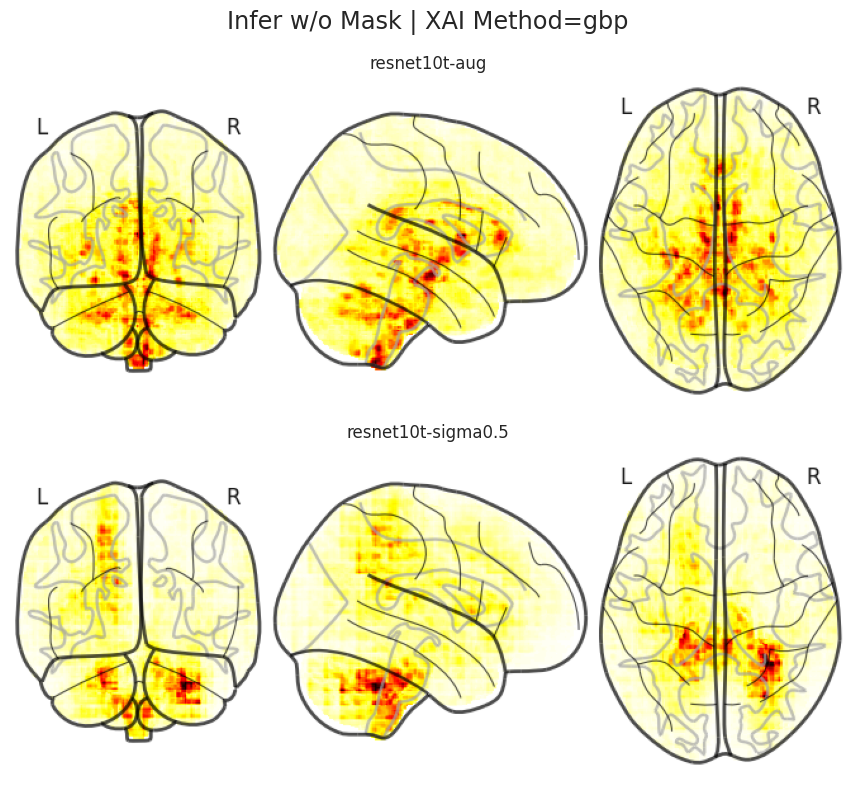

In [5]:
get_stacked_img(path=["resnet10t-aug", "resnet10t-sigma0.5"],
                method="gbp", top_k=0.99,
                indiv=True, mask=False)

[PosixPath('assets/weights/resnet10t-aug/mask/gbp-indiv-k0.99/glass.png'), PosixPath('assets/weights/resnet10t-sigma0.5/mask/gbpk0.99/top_glass.png')]


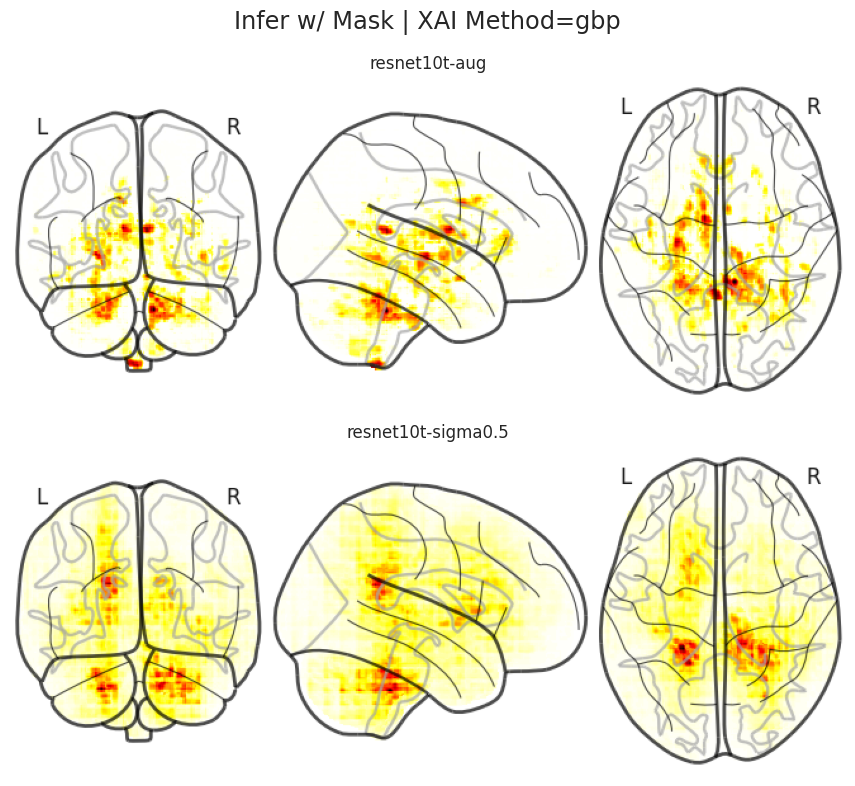

In [6]:
get_stacked_img(path=["resnet10t-aug", "resnet10t-sigma0.5"],
                method="gbp", top_k=0.99,
                indiv=True, mask=True)

[PosixPath('assets/weights/resnet10t-mask/mask/gbp-total/glass.png'), PosixPath('assets/weights/resnet10t-naive/mask/gbp-total/glass.png')]


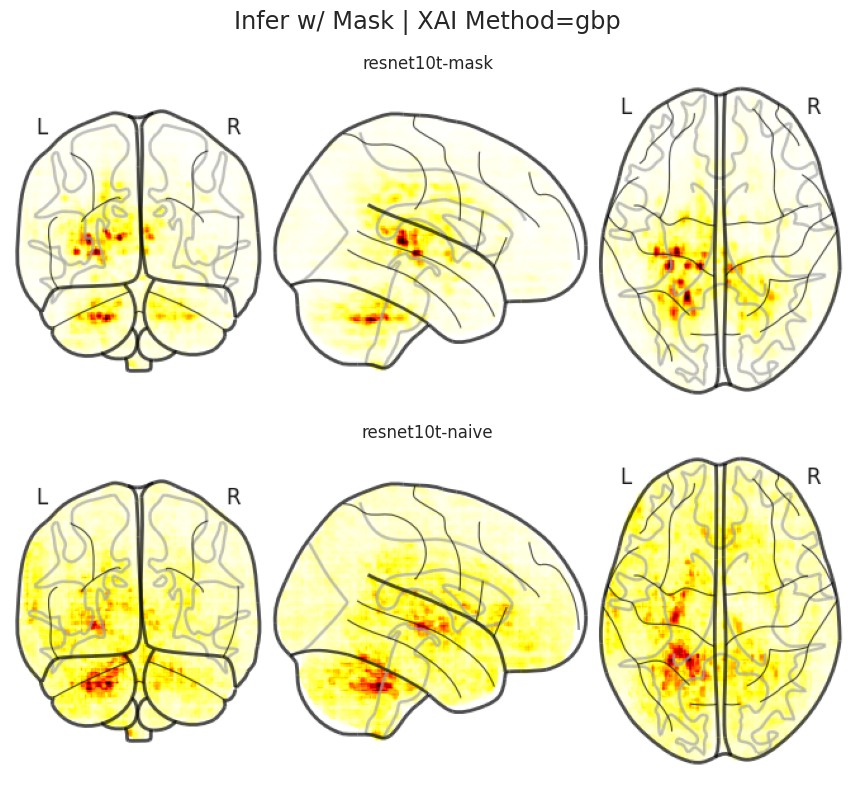

In [41]:
get_stacked_img(path=["resnet10t-mask", "resnet10t-naive", "swinvit_pre-aug"][:2],
                method="gbp",
                indiv=False, mask=True)

[PosixPath('assets/weights/resnet10t-mask/no-mask/gbp-total/glass.png'), PosixPath('assets/weights/resnet10t-naive/no-mask/gbp-total/glass.png')]


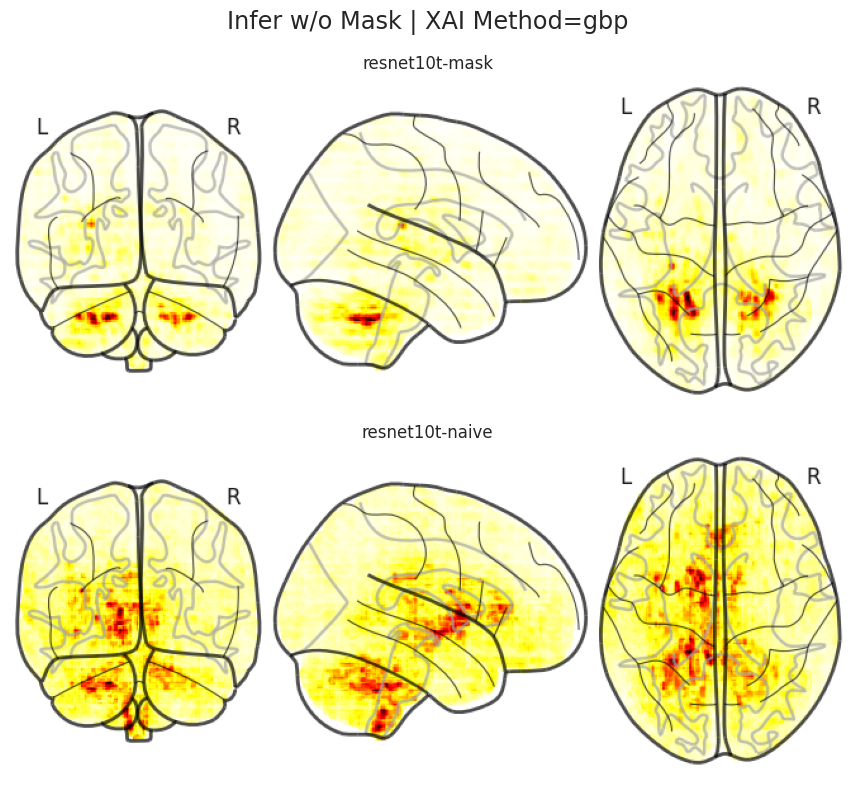

In [42]:
get_stacked_img(path=["resnet10t-mask", "resnet10t-naive", "swinvit_pre-aug"][:2],
                method="gbp",
                indiv=False, mask=False)

[PosixPath('assets/weights/resnet10t-mask/mask/ig-total/glass.png'), PosixPath('assets/weights/resnet10t-naive/mask/ig-total/glass.png')]


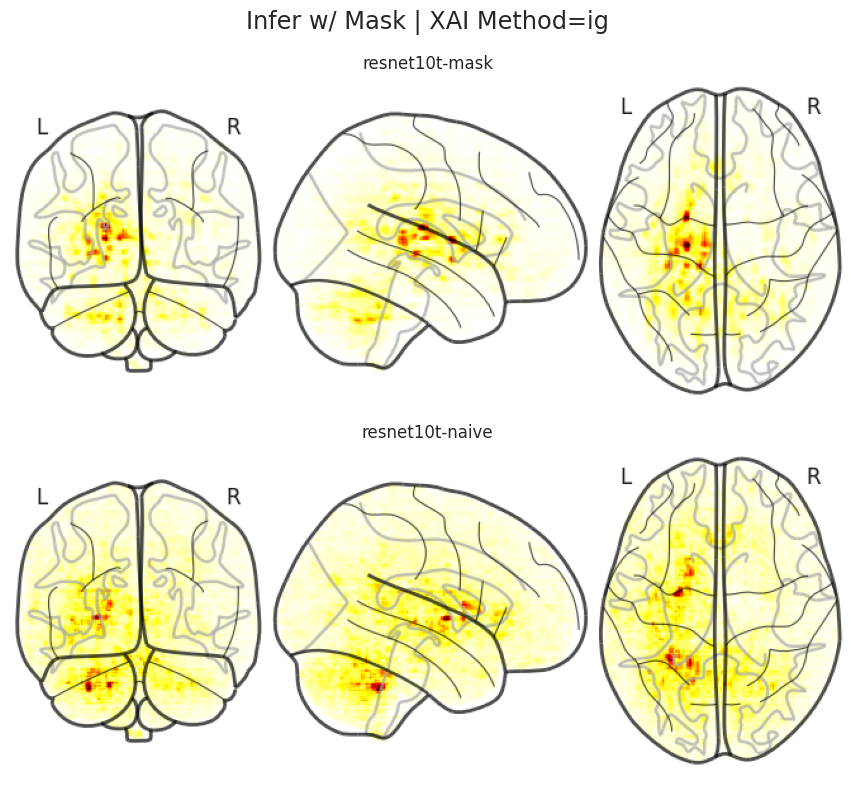

In [39]:
get_stacked_img(path=["resnet10t-mask", "resnet10t-naive", "swinvit_pre-aug"],
                method="ig",
                indiv=False, mask=True)

[PosixPath('assets/weights/resnet10t-mask/no-mask/ig-total/glass.png'), PosixPath('assets/weights/resnet10t-naive/no-mask/ig-total/glass.png')]


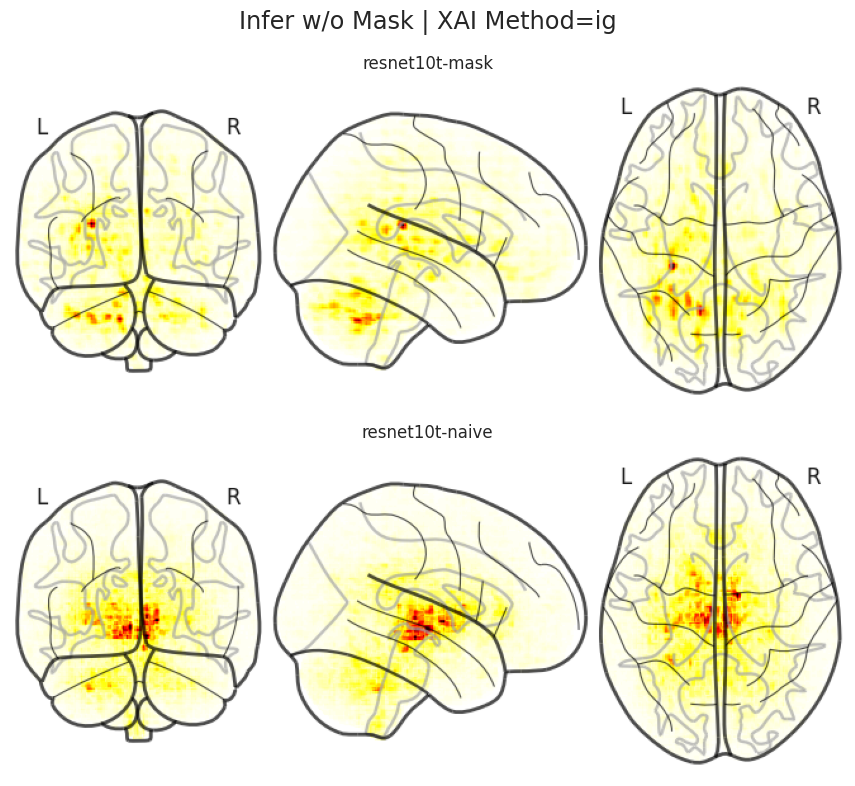

In [40]:
get_stacked_img(path=["resnet10t-mask", "resnet10t-naive", "swinvit_pre-aug"],
                method="ig",
                indiv=False, mask=False)